In [1]:
# to import the gmf.py, this cell should be only executed once after kernel restart
%cd ..
%cd ..
%cd ..

/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/notebooks/UF23
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/notebooks
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs


/home/flandgraf/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from gammaALPs.bfields import gmf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import TwoSlopeNorm

fatal: No names found, cannot describe anything.


In [3]:
x = np.arange(-20., 20.1, 0.1)
y = np.arange(-20., 20.1, 0.1)
z = np.arange(-10., 10.02, 0.05)
xx, yy, zz = np.meshgrid(x, y, z, indexing='ij')

In [4]:
rr = np.sqrt(np.power(xx, 2) + np.power(yy, 2))
pp = np.arctan2(yy, xx)

In [5]:
models = ['base', 'expX', 'neCL', 'nebCor', 'cre10', 'synCG', 'spur']

In [6]:
uf23_models = []

for mod in models:
    uf23_models.append(gmf.UF23(model=mod))

In [7]:
uf23_models

In [8]:
yplot = 0
idy = np.absolute(y-yplot).argmin()
print(idy)

200


In [10]:
Bhalo_tor = np.zeros((len(models), *xx[:, idy, :].shape))

for k in range(len(models)):
    for i,xi in enumerate(xx[:,idy,:]):
        # returns (3,N),(N) tuple, first entry is field, second entry is abs value
        b = uf23_models[k].toroidal_halo_field(rho=np.sqrt(xi**2. + y[idy]**2.), z=zz[i,idy,:]) 
        Bhalo_tor[k][i,:] = b[1] * gmf.signum(b[0][1,:])

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(12,21))

for k, ax in enumerate(axs.flat[:-1]):
    plt.sca(ax)
    norm = TwoSlopeNorm(vmin=Bhalo_tor[k].min(), vcenter=0, vmax=Bhalo_tor[k].max())
    p = plt.pcolormesh(xx[:,idy,:], zz[:,idy,:], Bhalo_tor[k], norm=norm, cmap = plt.cm.bwr, shading='auto')
    
    plt.xlabel('x (kpc)')
    plt.ylabel('z (kpc)')
    plt.colorbar(p, label = '$B (\mu\mathrm{G})$', ticks=[-3,-2,-1,0,1,2,3])
    plt.title(f"{models[k]} model")
    
    plt.grid()

fig.delaxes(axs.flat[7])
# plt.savefig('notebooks/UF23/plots/GMF/7_halo_tor.png')
plt.show()

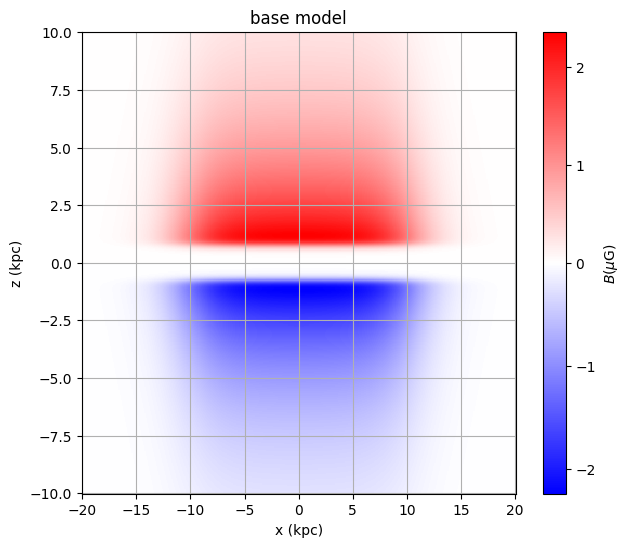

In [21]:
plt.figure(figsize=(7,6))

k=0
norm = TwoSlopeNorm(vmin=Bhalo_tor[k].min(), vcenter=0, vmax=Bhalo_tor[k].max())
p = plt.pcolormesh(xx[:,idy,:], zz[:,idy,:], Bhalo_tor[k], norm=norm, cmap = plt.cm.bwr, shading='auto')

plt.xlabel('x (kpc)')
plt.ylabel('z (kpc)')
plt.colorbar(p, label = '$B (\mu\mathrm{G})$', ticks=[-3,-2,-1,0,1,2,3])
plt.title(f"{models[k]} model")

plt.grid()
# plt.savefig('notebooks/UF23/plots/GMF/1_halo_tor_base.png')
plt.show()

# Poloidal

In [34]:
(len(models), *xx[:, idy, :].shape)

(7, 401, 401)

In [36]:
BX = np.zeros((len(models), *np.array([3] + list(xx[:,idy,:].shape))))
BX_abs = np.zeros((len(models), *xx[:, idy, :].shape))

for k in range(len(models)):
    for i,xi in enumerate(xx[:,idy,:]):
        # returns (3,N),(N) tuple, first entry is field, second entry is abs value
        b = uf23_models[k].poloidal_halo_field(rho=np.sqrt(xi**2. + y[idy]**2.), z=zz[i,idy,:]) 
        BX_abs[k][i,:] = b[1] * gmf.signum(b[0][1,:])
        BX[k][:,i,:] = b[0]

In [38]:
BX_x = np.zeros((len(models), *BX[0][0].shape))
BX_y = np.zeros((len(models), *BX[0][0].shape))
BX_z = np.zeros((len(models), *BX[0][2].shape))

for k in range(len(models)):
    BX_x[k] = BX[k][0] * np.cos(pp[:,idy,...])
    BX_y[k] = BX[k][0] * np.sin(pp[:,idy,...])
    BX_z[k] = BX[k][2]
BX_abss = np.where(BX_abs == 0, 1e-24, BX_abs)

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(12,21))
cmap0 = LinearSegmentedColormap.from_list('', ['white', 'red'])

for k, ax in enumerate(axs.flat[:-1]):
    plt.sca(ax)
    #norm = TwoSlopeNorm(vmin=Bhalo_pol[k].min(), vcenter=0, vmax=Bhalo_pol[k].max())
    p = plt.pcolormesh(xx[:,idy,:], zz[:,idy,:], BX_abs[k], cmap = cmap0, shading='auto')
    
    plt.xlabel('x (kpc)')
    plt.ylabel('z (kpc)')
    plt.colorbar(p, label = '$B (\mu\mathrm{G})$')
    plt.title(f"{models[k]} model")

    z0 = 0.5
    idz = np.absolute(z-z0).argmin()
    # print(idz, z[idz])
    step = 14
    plt.quiver(xx[:,idy,idz][::step],  zz[:,idy,idz][::step],
               BX_x[k][:,idz][::step] / BX_abss[k][:,idz][::step], BX_z[k][:,idz][::step] / BX_abss[k][:,idz][::step],
               width=5e-3, scale=10
              )
    
    z0 = -1.5
    idz = np.absolute(z-z0).argmin()
    # print(z[idz])
    plt.quiver(xx[:,idy,idz][::step],  zz[:,idy,idz][::step],
               BX_x[k][:,idz][::step] / BX_abss[k][:,idz][::step], BX_z[k][:,idz][::step] / BX_abss[k][:,idz][::step],
               width=5e-3, scale=10
              )
    
    z0 = -5
    idz = np.absolute(z-z0).argmin()
    # print(z[idz])
    plt.quiver(xx[:,idy,idz][::step],  zz[:,idy,idz][::step],
               BX_x[k][:,idz][::step] / BX_abss[k][:,idz][::step], BX_z[k][:,idz][::step] / BX_abss[k][:,idz][::step],
               width=5e-3, scale=10
              )
    
    z0 = 5
    idz = np.absolute(z-z0).argmin()
    # print(z[idz])
    plt.quiver(xx[:,idy,idz][::step],  zz[:,idy,idz][::step],
               BX_x[k][:,idz][::step] / BX_abss[k][:,idz][::step], BX_z[k][:,idz][::step] / BX_abss[k][:,idz][::step],
               width=5e-3, scale=10
              )
    #plt.grid()

fig.delaxes(axs.flat[7])
# plt.savefig('notebooks/UF23/plots/GMF/7_halo_pol.png')
plt.show()

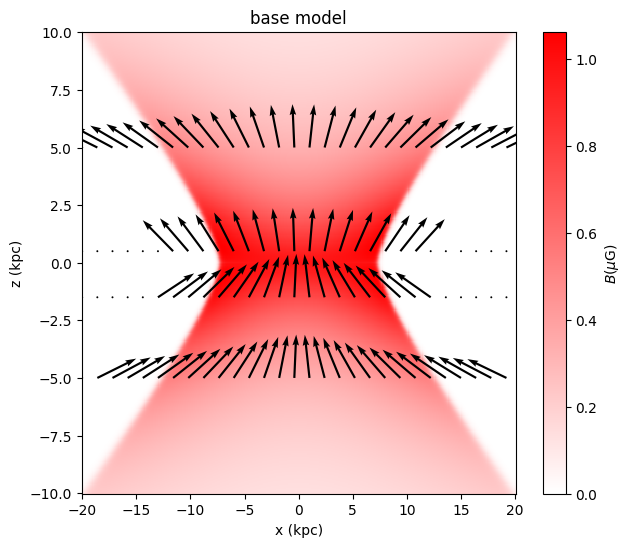

In [42]:
plt.figure(figsize=(7,6))

k=0

p = plt.pcolormesh(xx[:,idy,:], zz[:,idy,:], BX_abs[k], cmap = cmap0, shading='auto')

plt.xlabel('x (kpc)')
plt.ylabel('z (kpc)')
plt.colorbar(p, label = '$B (\mu\mathrm{G})$')
plt.title(f"{models[k]} model")

z0 = 0.5
idz = np.absolute(z-z0).argmin()
# print(idz, z[idz])
step = 14
plt.quiver(xx[:,idy,idz][::step],  zz[:,idy,idz][::step],
           BX_x[k][:,idz][::step] / BX_abss[k][:,idz][::step], BX_z[k][:,idz][::step] / BX_abss[k][:,idz][::step],
           width=5e-3, scale=10
          )

z0 = -1.5
idz = np.absolute(z-z0).argmin()
# print(z[idz])
plt.quiver(xx[:,idy,idz][::step],  zz[:,idy,idz][::step],
           BX_x[k][:,idz][::step] / BX_abss[k][:,idz][::step], BX_z[k][:,idz][::step] / BX_abss[k][:,idz][::step],
           width=5e-3, scale=10
          )

z0 = -5
idz = np.absolute(z-z0).argmin()
# print(z[idz])
plt.quiver(xx[:,idy,idz][::step],  zz[:,idy,idz][::step],
           BX_x[k][:,idz][::step] / BX_abss[k][:,idz][::step], BX_z[k][:,idz][::step] / BX_abss[k][:,idz][::step],
           width=5e-3, scale=10
          )

z0 = 5
idz = np.absolute(z-z0).argmin()
# print(z[idz])
plt.quiver(xx[:,idy,idz][::step],  zz[:,idy,idz][::step],
           BX_x[k][:,idz][::step] / BX_abss[k][:,idz][::step], BX_z[k][:,idz][::step] / BX_abss[k][:,idz][::step],
           width=5e-3, scale=10
          )
#plt.grid()

# plt.savefig('notebooks/UF23/plots/GMF/1_halo_pol_base.png')
plt.show()